<a href="https://colab.research.google.com/github/Vaishnavi-Naregavi/DL-Collab/blob/main/1132210414_Vaishnavi_Naregavi_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [2]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/data.csv")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df.head() #displays first 5 rows of the data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.tail() #displays last 5 rows of the data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [7]:
df.shape #displays the count of rows and columns of the dataset

(4600, 17)

In [8]:
df.dtypes #displays the datatype of the features

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [9]:
df.count()

price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [10]:
df.describe() #displays the statistical measures of the numerical features

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
df.info() #displays the complete information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(3), int64(10), object(4)
memory usage: 61

In [12]:
df.duplicated() #checking if there are any duplicate values in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

In [13]:
df.isnull().sum() #checking if there are any null values in the data and there are no null values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df['street'] = le.fit_transform(df['street'])
# printing label
df['street'].unique()

array([1522, 3899, 2291, ..., 4033, 3498, 1514])

In [15]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df['city'] = le.fit_transform(df['city'])
# printing label
df['city'].unique()

array([36, 35, 18,  3, 31, 21, 27, 20, 33,  1, 10,  5, 14, 19, 16, 42, 26,
       13, 32,  7, 38, 11,  6,  9, 15, 17, 25, 23,  4, 30,  8,  0, 37, 40,
       41, 43, 34, 22, 12, 39, 28,  2, 29, 24])

In [16]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df['statezip'] = le.fit_transform(df['statezip'])
# printing label
df['statezip'].unique()

array([62, 58, 26,  7, 31, 54, 23, 27, 67, 48, 42, 49,  6, 45, 73,  5, 46,
        9, 60,  2, 63, 21, 17, 56, 22, 41, 13, 50, 68, 55, 14, 33, 44, 15,
       37, 43, 10, 38, 74, 32, 36, 59, 47, 53,  4, 57, 70,  3, 11, 64, 69,
        0, 34, 65, 16, 66, 35, 25,  8, 30, 19, 52, 18, 61, 20, 71, 75, 51,
       40, 72,  1, 24, 12, 39, 28, 29, 76])

In [17]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df['country'] = le.fit_transform(df['country'])
# printing label
df['country'].unique()

array([0])

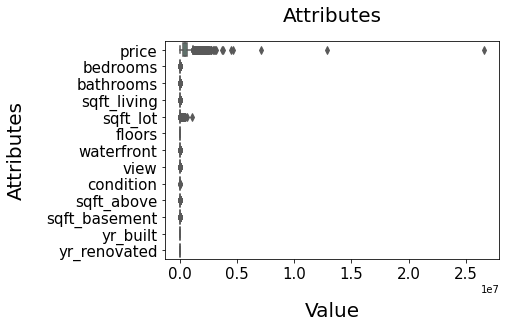

In [18]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [19]:
p0=df.price.min()
p100=df.price.max()
q1=df.price.quantile(0.25)
q2=df.price.quantile(0.5)
q3=df.price.quantile(0.75)
iqr=q3-q1

In [20]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0.0 , p100 =  26590000.0 , lc =  -175256.25 , uc =  1153093.75


In [21]:
df.price.clip(upper=uc)

0       3.130000e+05
1       1.153094e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [22]:
df.price.clip(upper=uc,inplace=True)

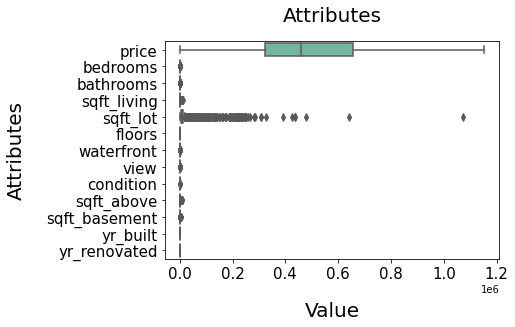

In [23]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [75]:
p0=df.sqft_lot.min()
p100=df.sqft_lot.max()
q1=df.sqft_lot.quantile(0.25)
q2=df.sqft_lot.quantile(0.5)
q3=df.sqft_lot.quantile(0.75)
iqr=q3-q1

In [76]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  638.0 , p100 =  20002.0 , lc =  -4000.0 , uc =  20002.0


In [77]:
df.sqft_lot.clip(upper=uc)
df.sqft_lot.clip(lower=lc)

0        7912.0
1        9050.0
2       11947.0
3        8030.0
4       10500.0
         ...   
4595     6360.0
4596     7573.0
4597     7014.0
4598     6630.0
4599     8102.0
Name: sqft_lot, Length: 4600, dtype: float64

In [78]:
df.sqft_lot.clip(upper=uc,inplace=True)
df.sqft_lot.clip(lower=lc,inplace=True)

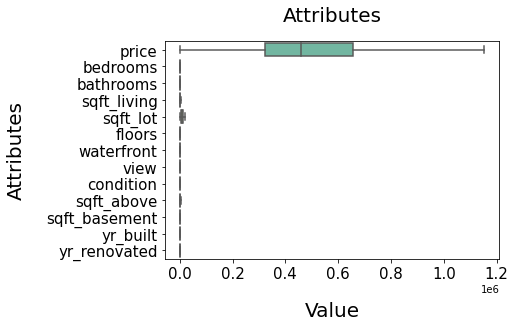

In [79]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [29]:
p0=df.sqft_basement.min()
p100=df.sqft_basement.max()
q1=df.sqft_basement.quantile(0.25)
q2=df.sqft_basement.quantile(0.5)
q3=df.sqft_basement.quantile(0.75)
iqr=q3-q1

In [30]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  4820 , lc =  -915.0 , uc =  1525.0


In [31]:
df.sqft_basement.clip(upper=uc)

0          0.0
1        280.0
2          0.0
3       1000.0
4        800.0
         ...  
4595       0.0
4596       0.0
4597       0.0
4598    1020.0
4599       0.0
Name: sqft_basement, Length: 4600, dtype: float64

In [32]:
df.sqft_basement.clip(upper=uc,inplace=True)

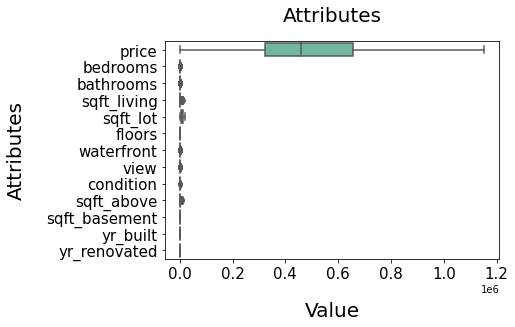

In [33]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [34]:
p0=df.sqft_above.min()
p100=df.sqft_above.max()
q1=df.sqft_above.quantile(0.25)
q2=df.sqft_above.quantile(0.5)
q3=df.sqft_above.quantile(0.75)
iqr=q3-q1

In [35]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  370 , p100 =  9410 , lc =  -475.0 , uc =  3965.0


In [36]:
df.sqft_above.clip(upper=uc)

0       1340.0
1       3370.0
2       1930.0
3       1000.0
4       1140.0
         ...  
4595    1510.0
4596    1460.0
4597    3010.0
4598    1070.0
4599    1490.0
Name: sqft_above, Length: 4600, dtype: float64

In [37]:
df.sqft_above.clip(upper=uc,inplace=True)
df.sqft_above.clip(lower=lc,inplace=True)

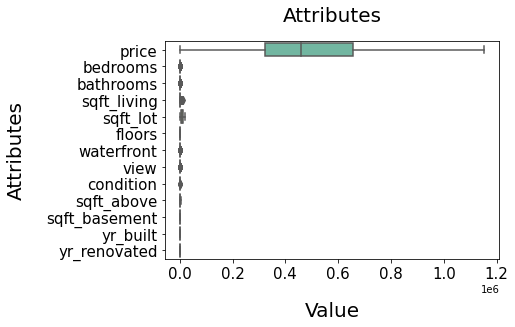

In [38]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [39]:
p0=df.condition.min()
p100=df.condition.max()
q1=df.condition.quantile(0.25)
q2=df.condition.quantile(0.5)
q3=df.condition.quantile(0.75)
iqr=q3-q1

In [40]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  1 , p100 =  5 , lc =  1.5 , uc =  5.5


In [44]:
df.condition.clip(upper=uc)
df.condition.clip(lower=lc)

0       3.0
1       5.0
2       4.0
3       4.0
4       4.0
       ... 
4595    4.0
4596    3.0
4597    3.0
4598    3.0
4599    4.0
Name: condition, Length: 4600, dtype: float64

In [45]:
df.condition.clip(upper=uc,inplace=True)
df.condition.clip(lower=lc,inplace=True)

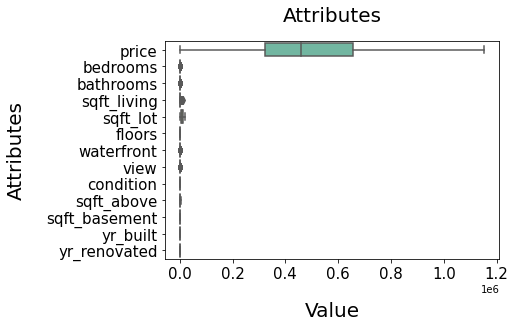

In [46]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [47]:
p0=df.view.min()
p100=df.view.max()
q1=df.view.quantile(0.25)
q2=df.view.quantile(0.5)
q3=df.view.quantile(0.75)
iqr=q3-q1

In [48]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  4 , lc =  0.0 , uc =  0.0


In [49]:
df.view.clip(upper=uc)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4595    0.0
4596    0.0
4597    0.0
4598    0.0
4599    0.0
Name: view, Length: 4600, dtype: float64

In [50]:
df.view.clip(upper=uc,inplace=True)

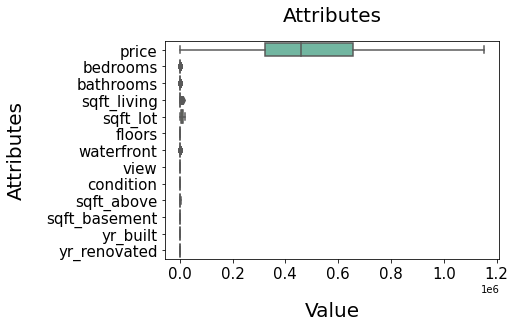

In [51]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [52]:
p0=df.waterfront.min()
p100=df.waterfront.max()
q1=df.waterfront.quantile(0.25)
q2=df.waterfront.quantile(0.5)
q3=df.waterfront.quantile(0.75)
iqr=q3-q1

In [53]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  1 , lc =  0.0 , uc =  0.0


In [54]:
df.waterfront.clip(upper=uc)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4595    0.0
4596    0.0
4597    0.0
4598    0.0
4599    0.0
Name: waterfront, Length: 4600, dtype: float64

In [55]:
df.waterfront.clip(upper=uc,inplace=True)

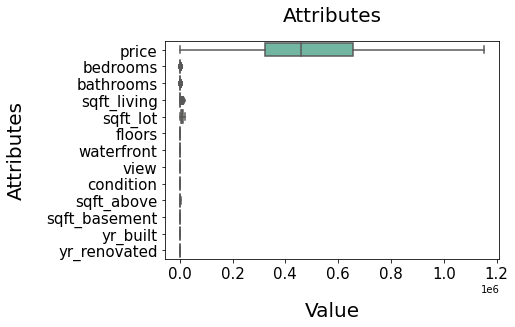

In [56]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [57]:
p0=df.sqft_living.min()
p100=df.sqft_living.max()
q1=df.sqft_living.quantile(0.25)
q2=df.sqft_living.quantile(0.5)
q3=df.sqft_living.quantile(0.75)
iqr=q3-q1

In [58]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  370 , p100 =  13540 , lc =  -280.0 , uc =  4360.0


In [59]:
df.sqft_living.clip(upper=uc)
df.sqft_living.clip(lower=lc)

0       1340
1       3650
2       1930
3       2000
4       1940
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 4600, dtype: int64

In [60]:
df.sqft_living.clip(upper=uc,inplace=True)
df.sqft_living.clip(lower=lc,inplace=True)

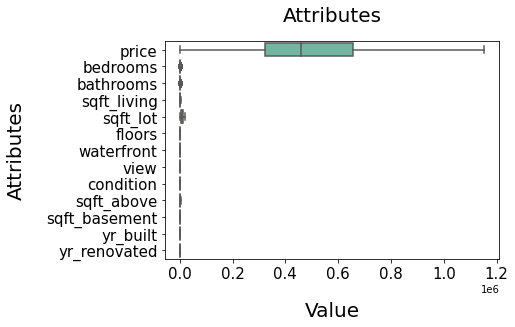

In [61]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [62]:
p0=df.bathrooms.min()
p100=df.bathrooms.max()
q1=df.bathrooms.quantile(0.25)
q2=df.bathrooms.quantile(0.5)
q3=df.bathrooms.quantile(0.75)
iqr=q3-q1

In [63]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0.0 , p100 =  8.0 , lc =  0.625 , uc =  3.625


In [64]:
df.bathrooms.clip(upper=uc)
df.bathrooms.clip(lower=lc)

0       1.50
1       2.50
2       2.00
3       2.25
4       2.50
        ... 
4595    1.75
4596    2.50
4597    2.50
4598    2.00
4599    2.50
Name: bathrooms, Length: 4600, dtype: float64

In [65]:
df.bathrooms.clip(upper=uc, inplace = True)
df.bathrooms.clip(lower=lc, inplace = True)

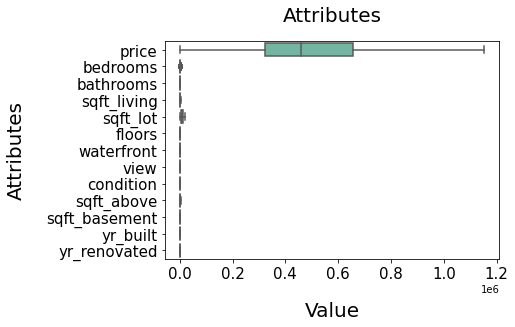

In [66]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [67]:
p0=df.bedrooms.min()
p100=df.bedrooms.max()
q1=df.bedrooms.quantile(0.25)
q2=df.bedrooms.quantile(0.5)
q3=df.bedrooms.quantile(0.75)
iqr=q3-q1

In [68]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  9 , lc =  1.5 , uc =  5.5


In [69]:
df.bedrooms.clip(upper=uc)
df.bedrooms.clip(lower=lc)

0       3.0
1       5.0
2       3.0
3       3.0
4       4.0
       ... 
4595    3.0
4596    3.0
4597    3.0
4598    4.0
4599    3.0
Name: bedrooms, Length: 4600, dtype: float64

In [70]:
df.bedrooms.clip(upper=uc,inplace=True)
df.bedrooms.clip(lower=lc,inplace=True)

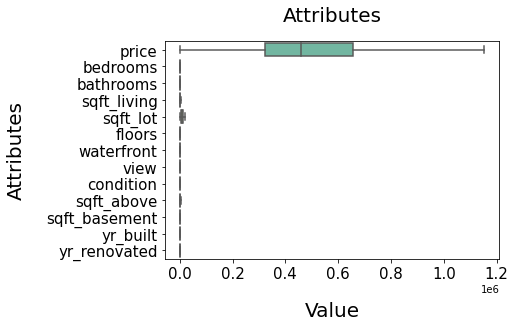

In [71]:
import seaborn as sns
#create the plot
ax = sns.boxplot(data = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [72]:
y = df['price']
X = df.drop(['price'],axis=1)

In [73]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955,2005,1522,36,62,0
1,5.0,2.50,3650.0,9050.0,2.0,0.0,0.0,5.0,3370.0,280.0,1921,0,3899,35,58,0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966,0,2291,18,26,0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963,0,4263,3,7,0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954,1979,3447,35,62,0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983,2009,960,3,6,0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009,0,4033,32,37,0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974,0,3498,35,71,0


In [74]:
y

0       3.130000e+05
1       1.153094e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [82]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='price prediction')

INFO:tensorflow:Reloading Oracle from existing project project/price prediction/oracle.json
INFO:tensorflow:Reloading Tuner from project/price prediction/tuner0.json


In [83]:
tuner.search_space_summary()

Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [84]:
tuner.search(X_train, y_train,epochs=5,validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [85]:
tuner.results_summary()

Results summary
Results in project/price prediction
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 256
units_1: 384
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 480
units_5: 160
units_6: 352
units_7: 320
units_8: 192
units_9: 64
units_10: 320
units_11: 320
units_12: 480
units_13: 256
units_14: 416
units_15: 64
units_16: 256
units_17: 128
units_18: 512
units_19: 320
Score: 158788.625
Trial summary
Hyperparameters:
num_layers: 20
units_0: 96
units_1: 480
learning_rate: 0.01
units_2: 224
units_3: 352
units_4: 288
units_5: 320
units_6: 384
units_7: 128
units_8: 352
units_9: 384
units_10: 288
units_11: 224
units_12: 224
units_13: 320
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 160130.96875
Trial summary
Hyperparameters:
num_layers: 9
units_0: 256
units_1: 192
learning_rate: 0.001
units_2: 384
units_3: 96
units_4: 288
units_5: 320
units_6: 160
units_7: 256
units_8: 352
units_9: 96
units_10: 160
units_11: 224
unit

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from sklearn.preprocessing import StandardScaler

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


In [48]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [49]:
grid_result = grid.fit(X_train, y_train)

In [50]:
[grid_result.best_score_,grid_result.best_params_]

[0.008423913083970547,
 {'activation': 'sigmoid',
  'batch_size': 256,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [51]:
pred_y = grid.predict(X_test)

In [52]:
y_pred = (pred_y > 0.5)

In [53]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

ValueError: ignored

In [ ]:
cm

In [55]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

ValueError: ignored

In [56]:
score

NameError: ignored